**In this report, we will use the given titanic_data.csv to analyze and explore the following questions.**

1. Is there a relationship between passenger class and passenger survival? More specifically, is the likelihood of passenger's survival lower for class 3 passengers when compared to class 1 passengers?

2. Is there a relationship between passenger's age/sex and passenger survival? Can we predict the probability of a passenger's survival from his or her sex and age?

    - In the first question, the independent variable is passenger class and there are 3 passenger classes (1, 2, 3) with 1 being the highest class. In the second question, the independent variables are passenger's age and sex. 

    - For both questions, the dependent or response variable is survival, with 1 as survived and 0 as deceased.
    
First, let's load the csv to a pandas dataframe and study the first few rows. 

In [11]:
import pandas as pd
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**From a quick glance, we can take note of data types for the variables: Survived - Integer, Pclass - Integer, Sex - String, Age - Float. Now let's explore the first set of questions: Is there a relationship between passenger class and passenger survival? More specifically, is the likelihood of passenger's survival lower for class 3 passengers when compared to class 1 passengers?**

First, we will group by Pclass to print the number of survivors by class. Then, we draw a pie chart using the values to highlight how number of survivors differ by class.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# print number of survivors by class
Pclass = titanic_df.groupby('Pclass')
print titanic_df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


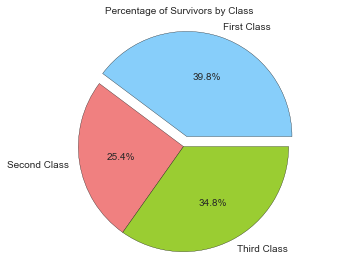

In [13]:
#Draw pie chart showing class proportions

labels = 'First Class', 'Second Class', 'Third Class'
values = [136, 87, 119]
colors = ['lightskyblue', 'lightcoral', 'yellowgreen']
explode = (0.1, 0, 0)

plt.pie(values, labels=labels, explode = explode, colors = colors, autopct='%1.1f%%')
plt.axis('equal')
plt.suptitle('Percentage of Survivors by Class')
plt.show()

Above pie chart shows the number of survivors by class, but for a clearer understanding of each class proportions, we calculate the ratio of survivors by class.

In [14]:
# print ratio of survivors by class
Pclass_ratio = (Pclass['Survived'].sum())/Pclass['Survived'].size()
print Pclass_ratio

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


Above results show that while second class had less survivors than third class overall (class 2 = 87 vs. class 3 = 119), a bigger proportion of passengers survived the disaster. Next, we plot a bar graph to clearly illustrate the differences between classes. We can see again that as class lowers to 3, the likelihood of surviving the disaster decreases.

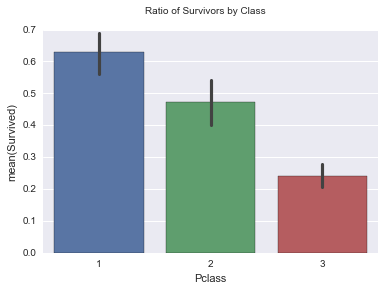

In [15]:
sns.barplot(x="Pclass", y="Survived", data = titanic_df)
plt.suptitle('Ratio of Survivors by Class')
plt.show()

While this suggests there is a relationship between class and survival, maybe there is another explanation. One hypothesis is that gender is at play. Maybe more female passengers were in class 1 and this affected the survival rates. Let's take a further look at class, but this time segment it by sex.

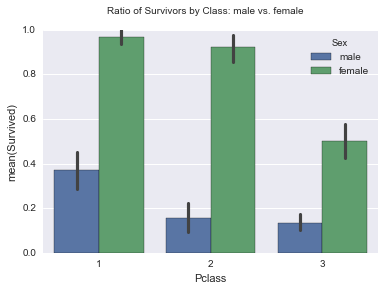

In [16]:
sns.barplot(x="Pclass", y="Survived", hue ="Sex", data = titanic_df)
plt.suptitle('Ratio of Survivors by Class: male vs. female')
plt.show()

**Above graph shows that the relationship between passenger class and survival stays valid. Survival ratios of class 3 passengers for both gender groups are nearly half the ratios of class 1 passengers. It is clear however, that gender is at play in determining the survival rates. To explore further, let's look at the second set of questions: Is there a relationship between passenger's sex/age and passenger survival? Can we predict the probability of a passenger's survival from his or her sex and age?**

Before we begin analyzing the relationship between sex/age and survival, let's look at the distribution of passenger ages to get a better understanding of population onboard Titanic. Looking at the raw csv file, we can see there are missing age fields. As such, we will first use the dropna function to remove the group without the age information. Then, we can look at a few statistical measures such as mean, standard deviation, and range.

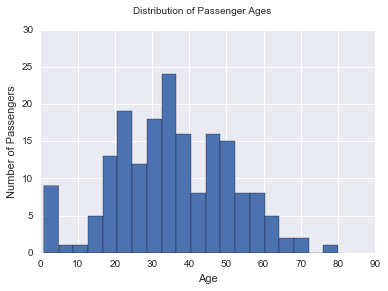

In [17]:
titanic_df2 = titanic_df.dropna()
nbins = 20
plt.hist(titanic_df2['Age'], nbins)
plt.axis([0,90,0,30])
plt.suptitle('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [18]:
titanic_df2['Age'].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

**Mean age of 36**

The passenger ages graph shows a normally distrbuted curve with a mean age of 36 with a standard deviation of 16, rounded to the nearest integer. This suggests not as many young / old passenger compared to the overall passenger group, but nevertheless, it would be interesting to explore whether or not age and sex have statistically significant effects on surviving the disaster.

To begin, we will set our young group's age range to be equal to or younger than 18 years old (<=18). Our older group's range will be set to older than 18 years old (>18). Then we will create a new dataframe (young_df) with age <=18 subset and group by sex to compare the survival numbers between young female & male groups.

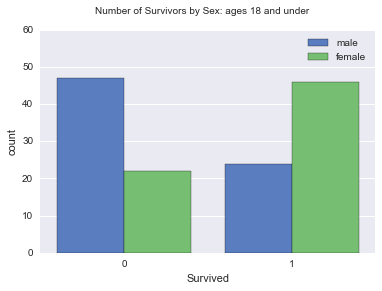

In [19]:
#Compare survival numbers between young female & male groups (<=18).

#Create new dataframe with subset of young group
young_df = titanic_df[titanic_df['Age'] <= 18]

#Create bar graphs
sns.countplot(x="Survived", hue="Sex", data = young_df, palette = "muted")
plt.suptitle("Number of Survivors by Sex: ages 18 and under")
plt.legend(loc='upper right')
plt.ylim([0,60])
plt.show()

From our above graphs, we can see that young female group has roughly double the survival numbers compared to the young male group. Conversely, the male group has roughly double the deceased numbers compared to the young female group.

Now, let's see if this is also true for the older age group (>18). 

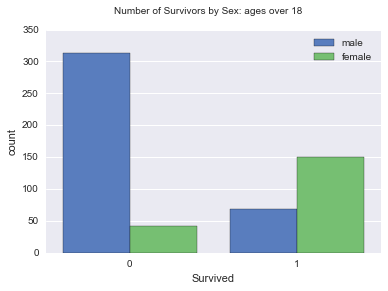

In [20]:
#Compare survival numbers between older female & male groups (>18).

#Create new dataframe with subset of older group
older_df = titanic_df[titanic_df['Age'] > 18]

#Create bar graphs
sns.countplot(x="Survived", hue="Sex", data = older_df, palette = "muted")
plt.suptitle("Number of Survivors by Sex: ages over 18")
plt.legend(loc='upper right')
plt.show()

Again, above graphs show that the female group has higher survival numbers. For the older group however, the differences are even more significant - females have roughly double the number of survivors and males have roughly 6 times higher death toll.

To statistically explore the results further, we will use logistic regression analysis as earlier. First, as the 'Sex' variable's data type is string, we create a function (string_convert) to convert the type to binary. If the value is 'male', the funtion will return 1 and 0 if is 'female'. Then we apply the function to 'Sex' column and create the 'Sex_new' column.

In [21]:
def string_convert(i):
    if i == 'male':
        return 1
    else:
        return 0
    
titanic_df['Sex_new'] = titanic_df['Sex'].apply(string_convert)

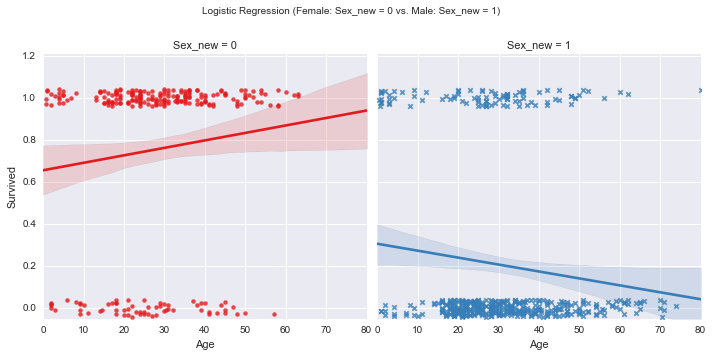

In [22]:
#Create logistic regression graphs

r = sns.lmplot(x="Age", y="Survived", hue = "Sex_new", col = "Sex_new", markers=["o", "x"], data = titanic_df, y_jitter=.04, palette = "Set1")
r.set(xlim=(0,80), ylim=(-.05, 1.21))

plt.subplots_adjust(top=0.85)
r.fig.suptitle('Logistic Regression (Female: Sex_new = 0 vs. Male: Sex_new = 1)')

plt.show()


Above graphs suggest that overall, males have much lower probability of surviving the disaster. Furthermore, the probability of survival decreases as age increases whereas for females, the probability of survival increases as age increases. As an older male aboard Titanic, it would have been tougher to survive the disaster.

### Conclusions

Below are questions we posed in the beginning of the report. 

1. Is there a relationship between passenger class and passenger survival? More specifically, is the likelihood of passenger's survival lower for class 3 passengers when compared to class 1 passengers?

2. Is there a relationship between passenger's sex/age and passenger survival? Can we predict the probability of a passenger's survival from his or her sex and age?

**Results from the analyses suggest the following answers to above questions:**

As passenger class lowers (from 1 to 3), the number of passengers who survived the disaster decreases in ratio. The likelihood of passenger's survival is lower for a class 3 passenger when compared to a class 1 passenger. To see if there is another explanation, we grouped the results by sex. Maybe more female passengers were in class 1 and this affected the survival rates. What we found was similar to before - survival ratios of class 3 passengers for both gender groups were nearly half the ratios of class 1 passengers. It became clear however, that gender is at play in determining the survival rates.

To explore further, we addressed the second set of questions. Dividing the results into ages <=18 and >18, we visualized using bar graphs, the number of survivors by sex. Overall, females had a significantly higher likelihood of surviving the disaster in both young and old age groups. For the older group however, the number of survivors differed even more significantly - females had roughly double the number of survivors and males had roughly 6 times higher death toll.

Similarly, when we explore the results using statistical analysis, we saw that males have a much lower probability of surviving the disaster. Furthermore, the probability of survival decreases as age increases whereas for females, the probability of survival increases as age increases. 

In sum, the results suggest that as a class 3 adult male onboard Titanic, there is less likelihood of surviving the disaster than a class 1 adult female. Before concluding, it is important to note the limitations of the results. Though the titanic disaster is a singular event, it is still a sample of a population. As a result, we cannot generalize the results and apply them to other ship disasters. Furthermore, this dataset was at least in part collected after the disaster, which means that there is significant survivor bias. Lastly, it is important to remember that correlation does not imply causation. Results suggest a likelihood of the relationship and do not mean that these variables saved the survivors.

Following is the list of resources used to complete the report:

- https://discussions.udacity.com/c/nd002-p2-intro-to-data-analysis/p2-investigate-a-dataset
- http://stackoverflow.com/
- https://stanford.edu/~mwaskom/software/seaborn/examples/logistic_regression.html

Report by Grace Cho for dand p2